In [109]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math


In [110]:
# def draw_ellipse(arr):
#     points = dict()
#     for i in range(len(arr) - 1):
#         draw_line(arr[i][0][0], arr[i][0][1], arr[i + 1][0][0], arr[i + 1][0][1], arr[i][1], arr[i + 1][1], arr[i][0][2], arr[i + 1][0][2], points)
#     draw_line(arr[len(arr) - 1][0][0], arr[len(arr) - 1][0][1], arr[0][0][0], arr[0][0][1], arr[len(arr) - 1][1], arr[0][1], arr[len(arr) - 1][0][2], arr[0][0][2], points)
#     return points


def draw_pic_line(pic, start_x, end_x, y, zb):
    z1 = start_x[2]
    z2 = end_x[2]
    if end_x[0] == start_x[0]:
        if z1 > zb[y, start_x[0]]:
            pic[y, start_x[0]] = start_x[1]
            zb[y, start_x[0]] = z1
        return
    dcolor = (end_x[1].astype('float64') - start_x[1].astype('float64')) / (end_x[0] - start_x[0])
    color = start_x[1].copy().astype('float64')
    dz = (z2 - z1) / (end_x[0] - start_x[0])
    for x in range(start_x[0], end_x[0] + 1):
        if z1 > zb[y, x]:
            pic[y, x] = color
            zb[y, x] = z1
        z1 += dz
        color += dcolor


def interpolation_fill(pic, points, zb):
    for i in range(len(points)):
#     for y, value in points.items():
        arr = points[i][0]
        start_x = arr[0]      
        k = 0
        for i in range(1, len(arr)):
            if arr[i][0] - arr[i - 1][0] > 1:
                if k == 1:
                    draw_pic_line(pic, start_x, arr[i - 1], y)
                    start_x = arr[i]
                k = (k + 1) % 2
            elif k == 0:
                start_x = arr[i]
        draw_pic_line(pic, start_x, arr[len(arr) - 1], y, zb)



In [111]:

# def draw_line(x1, y1, x2, y2, c1, c2, z1, z2, points):
#     x1, x2, y1, y2, c1, c2, z1, z2, paint= choice_direction(x1, x2, y1, y2, c1, c2, z1, z2)
#     dx = x2 - x1
#     dy = abs(y2 - y1)
#     dz = (z2 - z1) / np.sqrt(dx * dx + dy * dy)
#     z = z1
#     deltac = ((c2 - c1) / np.sqrt(dx * dx + dy * dy)).astype("float64")
#     color = c1.copy().astype("float64")
#     sign = np.sign(y2 - y1)
#     min_y = min(y1, y2)
#     max_y = max(y1, y2)
#     d = -dx
#     dx = dx + dx
#     dy = dy + dy
#     y = y1
#     x = x1
#     while x <= x2:
#         d += dy
#         paint(x, y, z, color.astype("uint64"), points)
#         z += dz
#         color += deltac
#         if d > 0:
#             d -= dx
#             y += sign
#         x += 1
        
def draw_line(x1, y1, x2, y2,c1,c2,z1,z2, color1,color2,gran, arr,z):
    x1, x2, y1, y2, c1, c2, z1, z2, paint= choice_direction(x1, x2, y1, y2, c1, c2, z1, z2)
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    deltac = ((color2 - color1) / np.sqrt(dx * dx + dy * dy)).astype("float64")
    dz = abs(z2-z1)/dx
    color = np.array(color1.copy().astype("float64"))
    x, y,z = x1, y1,z1
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    if dx > dy:
        err = dx / 2
        while x != x2:
#             vp[y:y+gran, x:x+gran] = color
            arr.append([[x,y, z,1], [color[0],color[1],color[2]]])
            color += deltac
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
            z +=dz
    else:
        err = dy / 2
        while y != y1:
#             vp[y:y+gran, x:x+gran] = color
            arr.append([[x,y, z,1], [color[0],color[1],color[2]]])         
            color += deltac
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
            z+=dz
    vp[y:y+gran, x:x+gran] = color
    arr.append([[x,y,z,1], [color[0],color[1],color[2]]])    
    return arr

In [112]:
def createfigure(num,color1,color2,color11,color22,arr,gran,arr1):
    x_center_1 =x_cent+ step
    y_center_1 = y_cent + int(step**2)
    z_center1 = 0 +step
    z = 0
    dz = 3
    x_center_2 = x_center_1+step
    y_center_2 = y_center_1 + int((2*step)**2)
    z_center_2 = z_center1 + step
    right = []
    left = []
    right1 = []
    left1 = []
    #vpravo
    if num == 0:
        # odna vetv (nyzhnaya)    

        arr= draw_line(y_cent,x_cent,y_center_1,x_center_1,1,1, z_center1,z_center_2,color1,color2,gran, arr,z)
        arr1= draw_line(y_cent,x_cent,y_center_1,x_center_1,1,1, -z_center1,-z_center_2,color11,color22,gran, arr,-z)
        arr.pop(len(arr)-1)
        arr1.pop(len(arr1)-1)
#         z+=dz
        
        arr= draw_line(y_center_1,x_center_1,y_center_2,x_center_2,1,1, z_center1,z_center_2,color2,color1,gran,arr,z)
        arr1= draw_line(y_center_1,x_center_1,y_center_2,x_center_2,1,1, -z_center1,-z_center_2,color22,color11,gran,arr,-z)
        
        arr.pop(len(arr)-1)
        arr1.pop(len(arr1)-1)
#         z+=dz
        right= draw_line(y_cent,x_cent,y_center_1,x_center_1,1,1, z_center1,z_center_2,color1,color2,gran,  right,z)

        right1 = draw_line(y_cent,x_cent,y_center_1,x_center_1,1,1, -z_center1,-z_center_2,color11,color22,gran,  right1,-z)
        
        right.pop(len(right)-1)
        right1.pop(len(right1)-1)
#         z+=dz
        right = draw_line(y_center_1,x_center_1,y_center_2,x_center_2,1,1, z_center1,z_center_2,color2,color1,gran, right,z)
        right.pop(len(right)-1)
        

        right1= draw_line(y_center_1,x_center_1,y_center_2,x_center_2,1,1, -z_center1,-z_center_2,color22,color11,gran, right1,-z)
        right1.pop(len(right)-1)
#         z+=dz
        
        
#         vtorai vetv (verhnaya)
        arr= draw_line(y_center_1,x_center_1,y_cent,x_cent,1,1, z_center1,z_center_2,color2,color1,gran, arr,z)
        arr.pop(len(arr)-1)
        arr1= draw_line(y_center_1,x_center_1,y_cent,x_cent,1,1, -z_center1,-z_center_2,color22,color11,gran, arr1,-z)
        arr1.pop(len(arr1)-1)
        z+=dz
        
        
        arr= draw_line(y_center_2,x_center_2,y_center_1,x_center_1,1,1,z_center1,z_center_2,color1,color2,gran, arr,z)
        arr.pop(len(arr)-1)
        arr1= draw_line(y_center_2,x_center_2,y_center_1,x_center_1,1,1, -z_center1,-z_center_2,color11,color22,gran, arr1,-z)
        arr1.pop(len(arr1)-1)
        z+=dz
        
        left= draw_line(y_center_1,x_center_1,y_cent,x_cent,1,1, z_center1,z_center_2,color2,color1,gran, left,z)
        left.pop(len(left)-1)
        left1 = draw_line(y_center_1,x_center_1,y_cent,x_cent,1,1, -z_center1,-z_center_2,color22,color11,gran, left1,-z)
        left1.pop(len(left1)-1)
        z+=dz
        
        left= draw_line(y_center_2,x_center_2,y_center_1,x_center_1,1,1, -z_center1,-z_center_2,color1,color2,gran, left,z)
        left.pop(len(left)-1)       
        left1 = draw_line(y_center_2,x_center_2,y_center_1,x_center_1,1,1, -z_center1,-z_center_2,color11,color22,gran, left1,-z)
        left1.pop(len(left1)-1)
        z+=dz
        
        
        
        
#     vnis  
    
    if num == 1:
        # odna vetv (pravaya)

        arr=draw_line(x_cent,y_cent,x_center_1,y_center_1,color1,color2,gran,arr,z)
        arr.pop(len(arr)-1)
        arr1=draw_line(x_cent,y_cent,x_center_1,y_center_1,color11,color22,gran,arr1,-z)
        arr1.pop(len(arr1)-1)
        z+=dz
        
        
        
        arr=draw_line(x_center_1,y_center_1,x_center_2,y_center_2,color2,color1,gran, arr,z)
        arr.pop(len(arr)-1)
        arr1=draw_line(x_center_1,y_center_1,x_center_2,y_center_2,color22,color11,gran, arr1,-z)
        arr1.pop(len(arr1)-1)
        z+=dz
        
        
        right=draw_line(x_cent,y_cent,x_center_1,y_center_1,color1,color2,gran,right,z)
        right.pop(len(right)-1)
        right1=draw_line(x_cent,y_cent,x_center_1,y_center_1,color11,color22,gran,right1,-z)
        right.pop(len(right)-1)
        z+=dz
        
        right=draw_line(x_center_1,y_center_1,x_center_2,y_center_2,color2,color1,gran, right,z)
        right.pop(len(right)-1)
        right1=draw_line(x_center_1,y_center_1,x_center_2,y_center_2,color22,color11,gran, right1,-z)
        right1.pop(len(right1)-1)  
        z+=dz            
        
        x_center_1 =x_cent - step
        x_center_2 = x_center_1 - step
                    
                    
        # vtorai vetv
        arr=draw_line(x_center_1,y_center_1,x_cent,y_cent,color2,color1,gran,arr,z)
        arr.pop(len(arr)-1)
        arr1=draw_line(x_center_1,y_center_1,x_cent,y_cent,color22,color11,gran,arr1,-z)
        arr1.pop(len(arr1)-1)
        z+=dz
        
        left=draw_line(x_center_1,y_center_1,x_cent,y_cent,color2,color1,gran,left,z)
        left.pop(len(left)-1)
        left1=draw_line(x_center_1,y_center_1,x_cent,y_cent,color22,color11,gran,left1,-z)
        left1.pop(len(left1)-1)
        z+=dz

        
        arr=draw_line(x_center_2,y_center_2,x_center_1,y_center_1,color1,color2,gran,arr,z)
        arr.pop(len(arr)-1)
        arr1=draw_line(x_center_2,y_center_2,x_center_1,y_center_1,color11,color22,gran,arr1,-z)
        arr1.pop(len(arr1)-1)
        z+=dz
                    
        left=draw_line(x_center_2,y_center_2,x_center_1,y_center_1,color1,color2,gran,left,z)
        left.pop(len(left)-1)
        left1=draw_line(x_center_2,y_center_2,x_center_1,y_center_1,color11,color22,gran,left1,-z)
        left1.pop(len(left1)-1)
        z+=dz

    return arr, arr1,left, left1,right,right1

In [113]:
def paint_x(x, y, z, color, points):
    x = int(x)
    y = int(y)
    if y in points:
        points[y].append([x, color, z])
    else:
        points[y] = [[x, color, z]]


def paint_y(y, x, z, color, points):
    x = int(x)
    y = int(y)
    if y in points:
        points[y].append([x, color, z])
    else:
        points[y] = [[x, color, z]]


def choice_direction(x1, x2, y1, y2, c1, c2, z1, z2):
    paint = paint_x
    if abs(x2 - x1) < abs(y2 - y1):
        x1, y1, x2, y2 = y1, x1, y2, x2
        paint = paint_y
    if x2 < x1:
        x1, x2, y1, y2, c1, c2, z1, z2 = x2, x1, y2, y1, c2, c1, z2, z1
    return x1, x2, y1, y2, c1, c2, z1, z2, paint 

In [114]:
def Zalivka_Grad(vp, right, left, num, arr,gran):
    if num == 1:
        left.sort(key=lambda x: x[0][0])
        right.sort(key=lambda x: x[0][0])
        for i in range(len(right)):
            for j in range(len(left)):
                x_r = right[i][0][0]
                y_r = right[i][0][1]
                x_l = left[j][0][0]
                y_l = left[j][0][1]
                z = right[i][0][2]
                if y_l == y_r:
#                     vp[y_r, x_l:x_r] = right[i][1]
#                     vp[y_r+gran, x_l:x_r] = right[i][1]
                    for k in range(1, abs(x_l-x_r) + 1+gran):
                        arr.append([[x_l,y_l,z,1], right[i][1]])
    if num == 0:
        left.sort(key=lambda x: x[0][0])
        right.sort(key=lambda x: x[0][0])
        for i in range(len(right)):
            for j in range(len(left)):
                x_r = right[i][0][0]
                y_r = right[i][0][1]
                x_l = left[j][0][0]
                y_l = left[j][0][1]
                z = right[i][0][2]
                if x_l == x_r:
#                     vp[y_l:y_r, x_l] = right[i][1]
#                     vp[y_l:y_r, x_l+gran] = right[i][1]
                    for k in range(1, abs(y_l - y_r) + 1+gran):
                        arr.append([[x_l, y_l + k, z,1], right[i][1]])
    return vp,arr


In [115]:
def Risunok(C,vp,kraska):
    for i in range(len(C)):
        vp[int(C[i][0]),int(C[i][1])] = kraska[i][1]
    return vp

In [116]:
def rotate(coords, angle_x, angle_y, angle_z, x, y, z):
    C = []
    for i in range(1,len(coords)):
        C.append([coords[i][0][0],coords[i][0][1],coords[i][0][2],coords[i][0][3]])
    shift1 = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 1, 0],
                       [-x, -y, -z, 1]])
    rotate_z = np.array([[np.cos(angle_z), np.sin(angle_z), 0, 0],
                       [-np.sin(angle_z), np.cos(angle_z), 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]])
    rotate_y = np.array([[np.cos(angle_y), 0, -np.sin(angle_y), 0],
                       [0, 1, 0, 0],
                       [np.sin(angle_y), 0, np.cos(angle_y), 0],
                       [0, 0, 0, 1]])
    rotate_x = np.array([[1, 0, 0, 0],
                       [0, np.cos(angle_x), np.sin(angle_x), 0],
                       [0, -np.sin(angle_x), np.cos(angle_x), 0],
                       [0, 0, 0, 1]])
    shift2 = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 1, 0],
                       [x, y, z, 1]])
#     C = np.dot(C,shift1)
#     C = np.dot(C,rotate_x)
#     C = np.dot(C,rotate_y)
#     C = np.dot(C,rotate_z)
#     C = np.dot(C,shift2)
#     for i in range(len(C)):
#         C[i] = [int(C[i][0]),int(C[i][1]),int(C[i][2]),int(C[i][3])]
    for i in range(len(coords)):
        coords[i, 0] = list(map(int, coords[i, 0] @ shift1 @ rotate_x @ rotate_y @ rotate_z @ shift2))
#     return C

In [117]:
def move(coords, dx, dy, dz):
    shift = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [dx, dy, dz, 1]])
    for i in range(len(coords)):
        coords[i, 0] = list(map(int, coords[i, 0] @ shift))


In [118]:
def combine(arr1, arr2, w, h):
    move(arr1, 0, 0, -arr1[0][0][2])
    move(arr2, arr1[0][0][0] - arr2[0][0][0], arr1[0][0][1] - arr2[0][0][1], -arr2[0][0][2])
    left = min(min(arr1, key = lambda el: el[0][0])[0][0], min(arr2, key = lambda el: el[0][0])[0][0])
    right = max(max(arr1, key = lambda el: el[0][0])[0][0], max(arr2, key = lambda el: el[0][0])[0][0])
    top = min(min(arr1, key = lambda el: el[0][1])[0][1], min(arr2, key = lambda el: el[0][1])[0][1])
    bottom = max(max(arr1, key = lambda el: el[0][1])[0][1], max(arr2, key = lambda el: el[0][1])[0][1])
    dx = (w - right - left) / 2
    dy = (h - bottom - top) / 2
    move(arr1, dx, dy, 0)
    move(arr2, dx, dy, 0)


In [119]:
def draw_background_border(picture, border_width, border_color):
    picture[:border_width, :] = border_color
    picture[:, :border_width] = border_color
    picture[-border_width:, :] = border_color
    picture[:, -border_width:] = border_color

def draw_background(w, h, border_color, border_width, background_color):
    arr_size = (h, w, 3)
    picture = np.full(arr_size, background_color, dtype='uint8')
    draw_background_border(picture, border_width, border_color)
    return picture

[70 86  0] 276 252


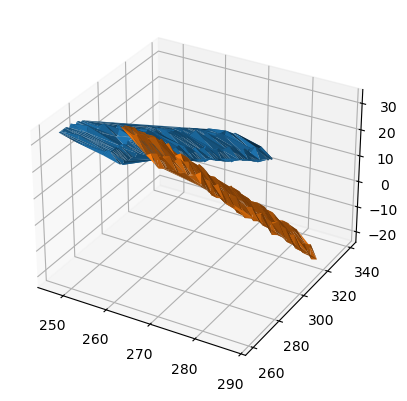

In [120]:

W = 400
H = 400
bg_clr = (255, 255, 255)
vp = np.full((H, W,3), bg_clr, dtype='uint8')
vp1 = np.full((H, W,3), bg_clr, dtype='uint8')
width = 5
blue = (0,0,255)
vp[:width,:] = blue
vp[:,-width:] = blue
vp[-width:,:] = blue
vp[:,:width] = blue


 # shag   
step = np.random.randint(3, 6)
# pologenie

gran = np.random.randint(2, 5)

num = np.random.randint(0,1)
center = np.random.randint(50, 150, size=3)
center[2] = 0
x_cent = np.random.randint(width+(step)**2 , W -  (2*step)**2)
y_cent = np.random.randint(width+(step)**2, H  -(2*step)**2)


print(center,x_cent,y_cent)
color1 = np.array([0, 255, 0])
color2 = np.array([255, 0, 0])
color11 = np.array([255, 251, 0])
color22 = np.array([0, 255, 250])

arr=[]
arr1=[]
left=[]
left1=[]
right=[]
right1=[]


arr,arr1,left,left1,right,right1 = createfigure(num,color1,color2,color11,color22,arr,gran,arr1)

vp,arr = Zalivka_Grad(vp, right, left, num, arr,gran)
vp,arr1 = Zalivka_Grad(vp, right1, left1, num, arr1,gran)

P1 = []
fi_x = np.deg2rad(np.random.randint(0,90))
fi_y = np.deg2rad(np.random.randint(0,90))
fi_z = np.deg2rad(np.random.randint(0,90))
arr = np.array(arr,dtype='object')
P1 = rotate(arr, fi_x, fi_y, fi_z, x_cent,y_cent, 0)

P2 = []
fi_x1 = np.deg2rad(np.random.randint(0,90))
fi_y1 = np.deg2rad(np.random.randint(0,90))
fi_z1 = np.deg2rad(np.random.randint(0,90))
arr1 = np.array(arr1,dtype='object')
P2 = rotate(arr1, fi_x1, fi_y1, fi_z1, x_cent,y_cent, 0)

# combine(arr,arr1,W,H)
zb = np.full((H, W), -1000000000)

# interpolation_fill(vp, arr, zb)

# interpolation_fill(vp, arr1, zb)

fig=plt.figure()
axes = fig.add_subplot(projection='3d')
x = []
y=[]
z=[]
for i in range(len(arr)):
    x.append(int(arr[i][0][1]))
    y.append(int(arr[i][0][0]))
    z.append(int(arr[i][0][2]))
x = np.array(x)
y = np.array(y)
z = np.array(z)

axes.plot_trisurf(x,y,z)
x1 = []
y1=[]
z1=[]
for i in range(len(arr1)):
    x1.append(int(arr1[i][0][1]))
    y1.append(int(arr1[i][0][0]))
    z1.append(int(arr1[i][0][2]))
x1 = np.array(x1)
y1 = np.array(y1)
z1 = np.array(z1)

axes.plot_trisurf(x1,y1,z1)
plt.show()

